In [1]:
# Preprocessing
import nltk # Python library for NLP
from nltk.corpus import twitter_samples # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt # library for visualization
import random # pseudo-random number generator
import numpy as np


In [2]:
# The dataset from NLTK is winnowed into positive and negative tweets, each containing 5000 tweets example, to have a balanced dataset
# download sample twitter dataset
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [3]:
# Loading text fields of positive and negative tweets by using the modules string() method
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
# Knowing the data structure of the dataset
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


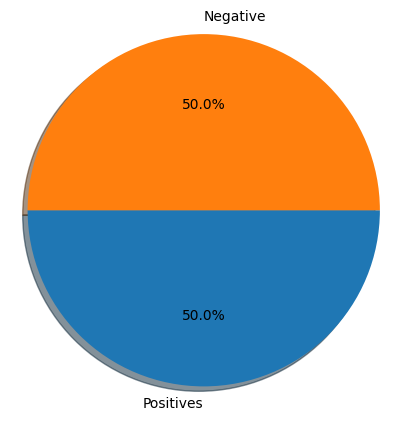

In [5]:
# Using pie chart to show the similar details by visualization

# Declare a figure of custom size
fig = plt.figure(figsize=(5,5))

# Labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()


### Before proceeding, let's print a few tweets from the dataset to get a sense of what they look like. Understanding the data is crucial, as it accounts for 80% of the success or failure in data science projects. This is an opportunity to observe key aspects that we should consider during the preprocessing stage.

In [6]:
# Print positive in green
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

Live night with two fams :) #bloodline #huskies
@lemoncandykiss tbh I forget who is the donation manager in Sin &amp; due to my hp corrupted did a restore all my data lost lor :(


### Preprocess raw text for Sentiment Analysis

### Data preprocessing is a vital step in any machine learning project. It involves cleaning and formatting the data before it is input into a machine learning algorithm. For natural language processing (NLP), preprocessing includes the following tasks:

    Tokenizing the text
    Converting to lowercase
    Removing stop words and punctuation
    Stemming

In [12]:
# Selecting a sample
tweet = all_positive_tweets[1227]
print(tweet)

@EczemaNoMore Thanks for the follow :) our soaps are perfect for #eczema sufferers


In [13]:
# Lets import stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
import re # library for regular expression operations
import string # for string operation

from nltk.corpus import stopwords # module for stop words that come with NLTK
from nltk.stem import PorterStemmer # module for stemming
from nltk.tokenize import TweetTokenizer # module for tokenizing strings

In [15]:
# Remove hyperlinks, Twitter marks and styles
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

@EczemaNoMore Thanks for the follow :) our soaps are perfect for #eczema sufferers

@EczemaNoMore Thanks for the follow :) our soaps are perfect for eczema sufferers


### Tokenize the string

In [16]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)



@EczemaNoMore Thanks for the follow :) our soaps are perfect for eczema sufferers


Tokenized string:
['thanks', 'for', 'the', 'follow', ':)', 'our', 'soaps', 'are', 'perfect', 'for', 'eczema', 'sufferers']


### Remove stop words and punctuations

In [17]:
# Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

print('Stop words \n')
print(stopwords_english)

print('\nPunctuation marks \n')
print(string.punctuation)


Stop words 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

### We can observe that the stop words list includes some words that might be significant in certain contexts, such as "i", "not", "between", "because", "won", and "against". For specific applications, you may need to customize the stop words list. Regarding punctuation, we've noted that certain groupings like ':)' and '...' should be kept when working with tweets, as they convey emotions. However, in other contexts, such as medical analysis, these should also be removed.

Now, let's clean up our tokenized tweet!

In [18]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')
tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
  if (word not in stopwords_english and word not in string.punctuation): # Remove stopwords and punctuations
    tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)





['thanks', 'for', 'the', 'follow', ':)', 'our', 'soaps', 'are', 'perfect', 'for', 'eczema', 'sufferers']

removed stop words and punctuation:
['thanks', 'follow', ':)', 'soaps', 'perfect', 'eczema', 'sufferers']


### Stemming

Stemming is the process of converting a word to its most basic form or stem. This helps in reducing the size of our vocabulary.

Consider the words:

    run
    running
    runner
    ran

All these words are stemmed from the common root "run". However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, "happi" and "easi". This occurs because the algorithm chooses the most common stem for related words. For instance, we can look at the set of words that comprises the different forms of "happy":

    happy
    happiness
    happier

We can see that the prefix "happi" is more commonly used. We cannot choose "happ" because it is the stem of unrelated words like "happen".

NLTK has different modules for stemming, and we will be using the PorterStemmer module, which uses the Porter Stemming Algorithm. Let's see how we can use it in the cell below.

In [19]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['thanks', 'follow', ':)', 'soaps', 'perfect', 'eczema', 'sufferers']

stemmed words:
['thank', 'follow', ':)', 'soap', 'perfect', 'eczema', 'suffer']


### process_tweet()

#### Preprocessing consists of multiple steps before you arrive at the final list of words.

In [21]:
from utils import process_tweet # Import the process_tweet function

# choose the same tweet
tweet = all_positive_tweets[1227]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('The Processed Tweet is: \n', tweets_stem)



@EczemaNoMore Thanks for the follow :) our soaps are perfect for #eczema sufferers

The Processed Tweet is: 
 ['thank', 'follow', ':)', 'soap', 'perfect', 'eczema', 'suffer']
